In [285]:
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [169]:
num_rows = 7
num_cols = 22
template = np.zeros((num_rows, num_cols), dtype=int)

In [170]:
tile_to_ix = {
    '0' : 0,
    '1' : 1,
    '2' : 2,
    '3' : 3,
    '4' : 4,
    'ground' : 5,
    'dollar' : 6,
    'sky' : 7,
    'black' : 8
}
ix_to_tile = {v:k for k, v in tile_to_ix.items()}

In [171]:
tiles_dir = 'tiles'
tile_to_png = {k : Image.open(f'{tiles_dir}/{k}.png') for k, _ in tile_to_ix.items()}

In [172]:
tile_to_png[ix_to_tile[8]]

In [173]:
def int_array_to_image(array):
    """
    Convert a 16-by-16 array of integers into a PIL.Image object
    param: array: a 16-by-16 array of integers
    """
    image = Image.new('RGBA', (array.shape[1] * 16, array.shape[0] * 16))
    for row, seg in enumerate(array):
        for col, ix in enumerate(seg):
            image.paste(tile_to_png[ix_to_tile[ix]], (col * 16, row * 16))
    return image

In [174]:
template[:-1] = tile_to_ix['sky']

template[-1] = tile_to_ix['ground']
template[:,-2] = tile_to_ix['ground']

template[0] = tile_to_ix['black']

template[0, 3] = tile_to_ix['1']
template[0, 5] = tile_to_ix['2']
template[0, 10] = tile_to_ix['0']
template[0, 9] = tile_to_ix['3']

template[-2, 3] = tile_to_ix['1']
template[-2, 5] = tile_to_ix['2']
template[-2, 10] = tile_to_ix['0']
template[-2, 9] = tile_to_ix['3']

template[-2, -1] = tile_to_ix['dollar']
template[-3, -1] = tile_to_ix['dollar']
template[-4, -1] = tile_to_ix['dollar']
template[-5, -1] = tile_to_ix['dollar']

In [289]:
def get_level(num_special_blocks):
    
    template = np.zeros((num_rows, num_cols), dtype=int)
    
    box_col_ixs = np.random.choice(np.arange(20), size=num_special_blocks, replace=False)
    
    template[:-1] = tile_to_ix['sky']
    
    template[-1] = tile_to_ix['ground']
    template[:,-2] = tile_to_ix['ground']
    
    template[0] = tile_to_ix['black']
    
    template[-2, box_col_ixs] = tile_to_ix['1']
    template[0, box_col_ixs] = tile_to_ix['1']
    
    for row_ix in [-2, -3, -4, -5, -6][:len(box_col_ixs)]:
        template[row_ix, -1] = tile_to_ix['dollar']
    
    return box_col_ixs, template

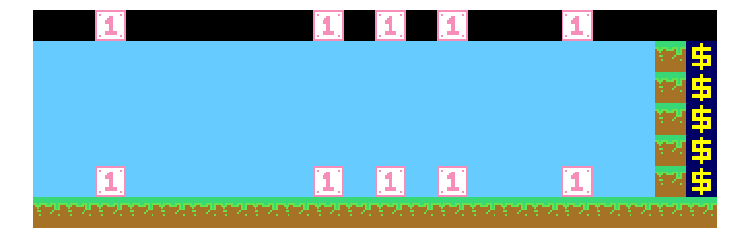

In [291]:
plt.figure(figsize=(20, 4))
plt.imshow(int_array_to_image(get_level(5)[1]))
plt.axis('off')
plt.show()

In [300]:
levels = []
box_col_ixs_s = []
np.random.seed(10)

for i in range(1000):
    
    box_col_ixs, level = get_level(4)
    box_col_ixs_s.append(box_col_ixs)
    levels.append(level)
    
    box_col_ixs, level = get_level(5)
    box_col_ixs_s.append(box_col_ixs)
    levels.append(level)
    
levels = np.array(levels)

np.random.seed(42)
np.random.shuffle(levels)
np.random.seed(42)
np.random.shuffle(box_col_ixs_s)

In [305]:
with open('levels.json', 'w+') as json_f:
    json.dump(levels.tolist(), json_f)
    
with open('box_col_ixs_s.json', 'w+') as json_f:
    json.dump([arr.tolist() for arr in box_col_ixs_s], json_f)

In [ ]:
get_inputs_and_targets